In [8]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def plot_metrics_chart(exp_root, dir_paths, metrics):
    metric_values = {metric: [] for metric in metrics}
    dir_labels = [Path(path).name for path in dir_paths]

    # Read data from each directory
    for dir_path in dir_paths:
        jsonl_path = Path(exp_root) / dir_path / 'all_queries_eval_results.jsonl'
        with open(jsonl_path, 'r') as f:
            data = json.load(f)
            for metric in metrics:
                metric_values[metric].append(data.get(metric, 0))

    x = np.arange(len(metrics))  # the label locations for metrics
    width = 0.8 / len(dir_paths)  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    colors = ['darkred', 'green'] + [None] * (len(dir_paths) - 2)  # Set first two colors to red and green

    # Plot bars for each directory
    for i, label in enumerate(dir_labels):
        offsets = x - (width * len(dir_paths) / 2) + (i * width)
        bars = ax.bar(offsets, [metric_values[metric][i] for metric in metrics], width, label=label, color=colors[i] if i < len(colors) else None)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

    # Set chart properties
    ax.set_ylabel('Mean')
    ax.set_xticks(x)
    ax.set_xticklabels([metric.replace('mean_', '') for metric in metrics], rotation=45, ha='right')
    ax.legend(title='Directories')
    plt.title('')  # No title as requested

    # Show the chart
    plt.tight_layout()
    plt.show()

In [53]:
exp_root = "experiments/dec_6_harder"
dir_paths = [
    #'roegen_ali_k60',
    #'roegen_miniLM_k60',
    'roegen_ali_rerank30_k60',
    #'roegen_ali_T3_k20',
    'roegen_ali_T3_k20_elab_instructions_4sent'
    #'roegen_ali_rerank10_k30'
]

metrics = ['mean_map_cut_30', 'mean_recall_30', 'mean_success_1', 'mean_success_3','mean_P_5']

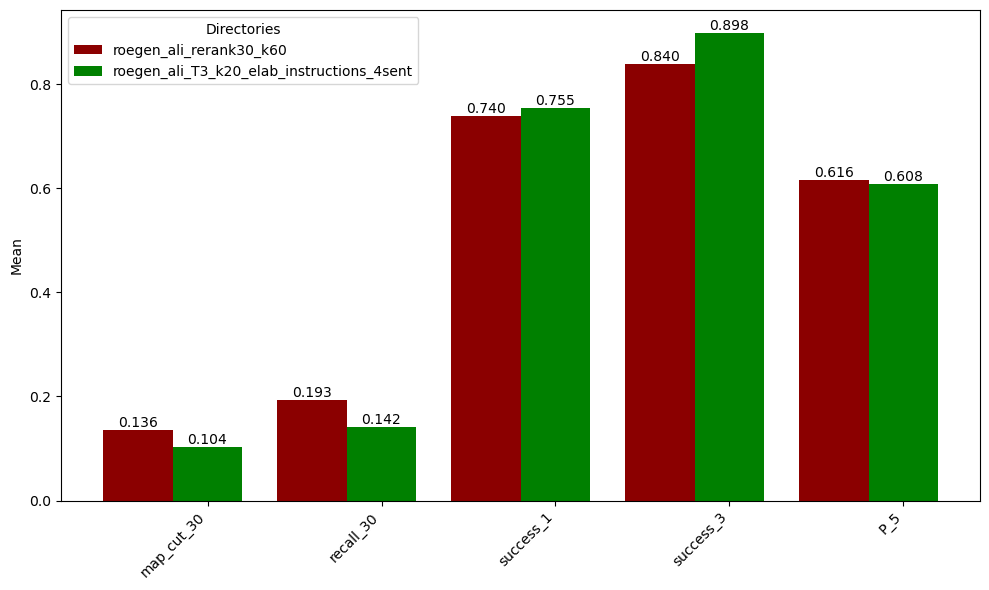

In [54]:
plot_metrics_chart(exp_root, dir_paths, metrics)  # Plot the chart with the given data